In [1]:
!pip install -q datasets transformers evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00


In [44]:
from transformers import pipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt



In [46]:
from google.colab import files
uploaded = files.upload()

Saving 3.jpg to 3.jpg


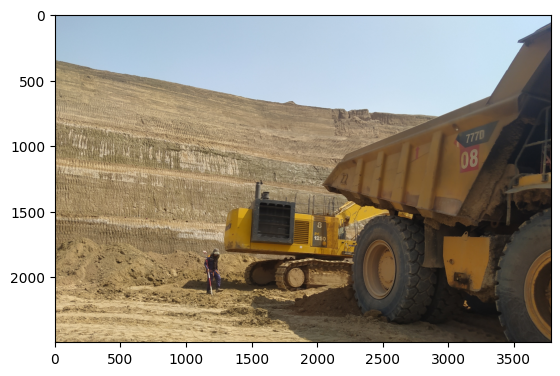

In [47]:
from io import BytesIO


image = Image.open(BytesIO(uploaded['3.jpg']))
plt.imshow(image)
plt.show()

In [48]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'rider',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'truck',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'bus',
  'mask': <PIL.Image.Image image mode=L size=3783x2497>},
 {'score': None,
  'label': 'train',
  'mask': 

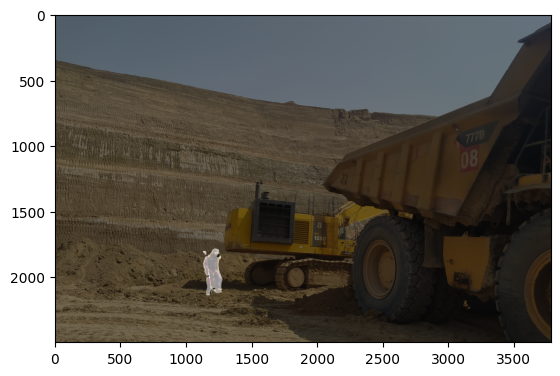

In [49]:
import numpy as np


for i in range (len(results)):
  if  results[i]['label'] == 'person':
    mask = results[i]['mask']
    #print('mask is founded')
    new_mask = [np.array(mask), np.array(mask), np.array(mask)]
    new_mask = np.transpose(new_mask,(1,2,0))
    #print('mask = ',np.shape(np.array(new_mask)))
    #print('image = ',np.shape(np.array(image)))
    final_image =  np.array(image) * 0.5 + np.array(new_mask, dtype=np.uint8) * 0.5
    final_image =  final_image.astype(np.uint8)
    plt.imshow(final_image)
    plt.show()

